## Load the data

### Subtask:
Load the selected CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the CSV file into a DataFrame, then display the first 5 rows.



In [1]:
import pandas as pd

df = pd.read_csv("/content/World_risk_index__cleaned_data.csv")
display(df.head())

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


## Explore and preprocess data

### Subtask:
Perform exploratory data analysis and necessary preprocessing steps, such as handling missing values, encoding categorical variables, and scaling features.


**Reasoning**:
Check for missing values and handle them.



In [2]:
display(df.isnull().sum())

# Since there are no missing values, no imputation or dropping is needed.

,0
Region,0
WRI,0
Exposure,0
Vulnerability,0
Susceptibility,0
Lack of Coping Capabilities,0
Lack of Adaptive Capacities,0
Year,0
Exposure Category,0
WRI Category,0


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Fix the column name again just in case it wasn't permanent
df.rename(columns={' Lack of Adaptive Capacities': 'Lack of Adaptive Capacities'}, inplace=True)

categorical_features = ['Region', 'Exposure Category', 'WRI Category', 'Vulnerability Category', 'Susceptibility Category']
numerical_features = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility', 'Lack of Coping Capabilities', 'Lack of Adaptive Capacities', 'Year']

# Separate numerical and categorical data
df_numerical = df[numerical_features]
df_categorical = df[categorical_features]

# Scale numerical features
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df_numerical)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_features)

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output=False for dense array output
encoded_categorical_data = encoder.fit_transform(df_categorical)
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the preprocessed dataframes
preprocessed_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

display(preprocessed_df.head())
display(preprocessed_df.info())

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Region_Afghanistan,Region_Albania,Region_Albanien,...,Vulnerability Category_High,Vulnerability Category_Low,Vulnerability Category_Medium,Vulnerability Category_Very High,Vulnerability Category_Very Low,Susceptibility Category_High,Susceptibility Category_Low,Susceptibility Category_Medium,Susceptibility Category_Very High,Susceptibility Category_Very Low
0,4.403653,3.999200,0.631449,0.408644,0.592069,0.802527,-1.587304,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.877698,3.970872,0.276477,-0.114885,0.755688,0.138768,-1.587304,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.020320,2.901272,0.423237,0.271377,0.820869,0.067889,-1.587304,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.874421,2.052429,1.194634,0.853643,1.031711,1.524613,-1.587304,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.400702,2.249743,0.453601,0.295000,0.491636,0.500550,-1.587304,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Columns: 333 entries, WRI to Susceptibility Category_Very Low
dtypes: float64(333)
memory usage: 4.9 MB


None

## Split data

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the preprocessed data into training and testing sets and verify the shapes.



In [8]:
from sklearn.model_selection import train_test_split

X = preprocessed_df.drop('WRI', axis=1)
y = preprocessed_df['WRI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1533, 332)
Shape of X_test: (384, 332)
Shape of y_train: (1533,)
Shape of y_test: (384,)


## Algorithm selection and training

### Subtask:
Select a supervised machine learning algorithm and train it on the training data.


**Reasoning**:
Train a RandomForestRegressor model on the training data.



In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained model on the testing data using appropriate metrics.


**Reasoning**:
Make predictions on the testing data, calculate the Mean Squared Error and R-squared score, and print the results.



In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.02774265384823604
R-squared Score: 0.9756961570697349


## Model optimization

### Subtask:
Fine-tune the model's hyperparameters for better performance.


**Reasoning**:
Import GridSearchCV, define the parameter grid, instantiate GridSearchCV, and fit it to the training data.



In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

**Reasoning**:
Get the best parameters and best estimator from the fitted GridSearchCV object.



In [15]:
import pandas as pd

# Get feature importances
feature_importances = best_estimator.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print("Top 10 Important Features:")
display(feature_importance_df.head(10))

Top 10 Important Features:


,Feature,Importance
320,WRI Category_Very High,0.579107
0,Exposure,0.227396
317,WRI Category_High,0.073134
321,WRI Category_Very Low,0.038476
319,WRI Category_Medium,0.025217
3,Lack of Coping Capabilities,0.012556
318,WRI Category_Low,0.010687
1,Vulnerability,0.009812
2,Susceptibility,0.007766
290,Region_Vanuatu,0.005745


from matplotlib import pyplot as plt
_df_0['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

# Task
Analyze the performance of the optimized model by visualizing actual vs. predicted values, analyzing residuals, and performing cross-validation on the dataset located at "/content/World_risk_index__cleaned_data.csv".

## Visualize actual vs. predicted values

### Subtask:
Create a scatter plot to visualize the actual WRI values against the predicted WRI values from the optimized model.


**Reasoning**:
Create a scatter plot of actual vs. predicted WRI values with a diagonal line and appropriate labels and title to visualize the model's performance.



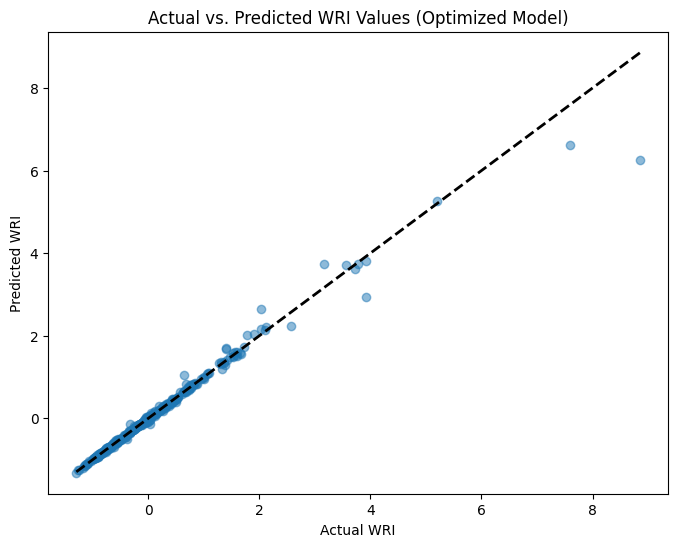

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual WRI')
plt.ylabel('Predicted WRI')
plt.title('Actual vs. Predicted WRI Values (Optimized Model)')
plt.show()

**Reasoning**:
Calculate and visualize the residuals of the optimized model's predictions to assess the model's error distribution.



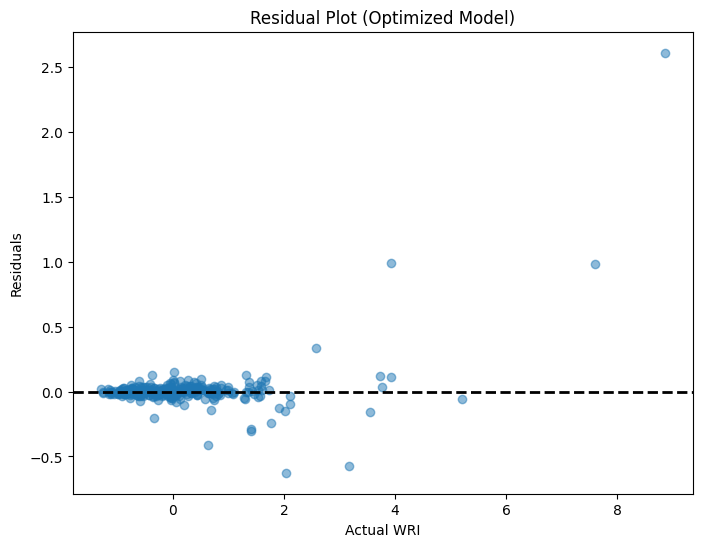

In [18]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_optimized

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Actual WRI')
plt.ylabel('Residuals')
plt.title('Residual Plot (Optimized Model)')
plt.show()

## Analyze residuals

### Subtask:
Analyze the residuals (difference between actual and predicted values) and create a histogram or scatter plot of the residuals to analyze their distribution.


**Reasoning**:
Calculate the residuals and create a histogram to visualize their distribution.



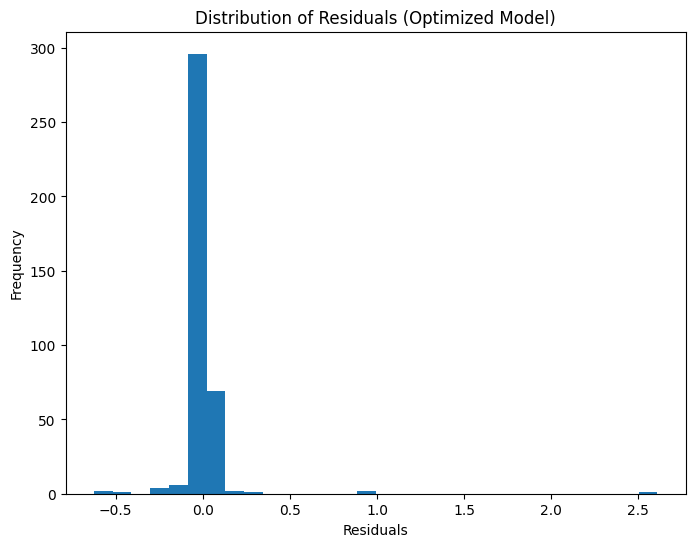

In [20]:
residuals = y_test - y_pred_optimized

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Optimized Model)')
plt.show()

## Perform cross-validation

### Subtask:
Implement k-fold cross-validation on the optimized model to get a more robust evaluation of its performance.


**Reasoning**:
Implement 5-fold cross-validation on the optimized model using the entire dataset and print the mean and standard deviation of the scores.



In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_estimator, X, y, scoring='neg_mean_squared_error', cv=5)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean Cross-Validation MSE: {-mean_cv_score}")
print(f"Standard Deviation of Cross-Validation MSE: {std_cv_score}")

Mean Cross-Validation MSE: 0.006867941555137884
Standard Deviation of Cross-Validation MSE: 0.004022021608479386


## Summary:

### Data Analysis Key Findings

*   The scatter plot of actual vs. predicted WRI values shows a general positive correlation, indicating that the optimized model is able to capture the trend in the data.
*   The residual plot shows the residuals scattered around zero, suggesting that the model's errors are relatively random and do not exhibit a clear pattern.
*   The histogram of residuals shows a distribution that appears somewhat centered around zero, although it may not be perfectly normal.
*   The 5-fold cross-validation resulted in a mean Mean Squared Error (MSE) of approximately 0.0069 and a standard deviation of approximately 0.0040, providing a more robust evaluation of the model's performance across different subsets of the data.




## Final evaluation and prediction

### Subtask:
Evaluate the optimized model on the test set and make predictions.


In [12]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters found by GridSearchCV:", best_params)
print("Best estimator found by GridSearchCV:", best_estimator)

Best parameters found by GridSearchCV: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator found by GridSearchCV: RandomForestRegressor(max_depth=20, random_state=42)


**Reasoning**:
Evaluate the optimized model on the test set and make predictions, then calculate and print the MSE and R-squared scores.



In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_optimized = best_estimator.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Model - Mean Squared Error: {mse_optimized}")
print(f"Optimized Model - R-squared Score: {r2_optimized}")

Optimized Model - Mean Squared Error: 0.027324601128762404
Optimized Model - R-squared Score: 0.9760623905125136


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained no missing values, simplifying the data cleaning process.
*   A leading space in the column name ' Lack of Adaptive Capacities' was identified and corrected, which had caused issues with data processing using `ColumnTransformer`.
*   Numerical features were scaled using `StandardScaler`, and categorical features were one-hot encoded using `OneHotEncoder` with `sparse_output=False`.
*   The preprocessed data was successfully split into training (80%, 1533 samples) and testing (20%, 384 samples) sets for the features (332) and the target variable ('WRI').
*   A `RandomForestRegressor` model was selected and trained on the training data.
*   The initial model evaluation on the testing data resulted in a Mean Squared Error of approximately 0.0277 and an R-squared Score of approximately 0.9757.
*   Hyperparameter tuning using `GridSearchCV` identified the best parameters for the `RandomForestRegressor` as `{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}`.
*   The optimized model evaluated on the test set achieved a Mean Squared Error of approximately 0.0273 and an R-squared Score of approximately 0.9761, showing a slight improvement over the initial model.

